## Grafici

In [1]:
# for the dataset
import pandas as pd    
import numpy as np

# general
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
import time

# for the tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# for the Random forest
from sklearn.ensemble import RandomForestClassifier

# for the SVM + packages for pipelines and scaling
from sklearn import svm
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# for the Gaussian
from sklearn.naive_bayes import GaussianNB

# for KNN
from sklearn.neighbors import KNeighborsClassifier

# to print more results and not just the last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#Dataset

# setting up labels for dataset
labels = ('class', 'spec_num', 'eccentr', 'asp_ratio', 'elong', 'solidity', 'stoch_conv', 'iso_factor', 'max_ind_depth', 'lobedness', 'av_intensity', 'av_contr', 'smooth', 'third_mom', 'unif', 'entropy')

# importing data
df = pd.read_csv(r'./leaf/leaf.csv', header = None, names = labels)

In [28]:
# for training and testing static division, if needed
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

### Single tree

In [6]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

#Grid Search - finding best estimators

# shuffling the dataframe + separating y from x + eliminating specimen number variable
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
# for n-min in proglie c'è da 2 a 40, ma forse 40 è troppo alto visto che le osservazioni sono meno di 400
grid_param = {'criterion': ['gini', 'entropy'], 'min_samples_split': np.arange(2, 20)}

tree_cv = GridSearchCV(tree.DecisionTreeClassifier(), grid_param, cv=8, scoring='balanced_accuracy')
tree_cv.fit(X, y)
print(tree_cv.best_score_)   #result: 0.6791666666666667
print(tree_cv.best_params_)  #result: {'criterion': 'entropy', 'min_samples_split': 4}

GridSearchCV(cv=8, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
             scoring='balanced_accuracy')

0.7000000000000001
{'criterion': 'entropy', 'min_samples_split': 3}


In [16]:
# Dati per grafico Single Tree - tentativo 1

TREE = []

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    clf_T1 = cross_validate(DecisionTreeClassifier(criterion = "entropy", min_samples_split = 4), X, y, cv=8, scoring = "balanced_accuracy")
    scores_tree = np.mean(clf_T1["test_score"])
    TREE.append(scores_tree)
    
print(TREE)
print(np.mean(TREE))

[0.6354166666666667, 0.64375, 0.6104166666666666, 0.6625, 0.5895833333333333, 0.6208333333333333, 0.6333333333333333, 0.6354166666666667, 0.64375, 0.6666666666666666, 0.625, 0.65, 0.6375, 0.61875, 0.625, 0.6166666666666667, 0.6291666666666667, 0.6520833333333333, 0.64375, 0.6270833333333333, 0.6, 0.6604166666666667, 0.64375, 0.6479166666666667, 0.6, 0.6416666666666666, 0.6375, 0.5979166666666667, 0.6333333333333333, 0.6124999999999999, 0.6312500000000001, 0.6083333333333334, 0.6708333333333334, 0.6375, 0.6416666666666666, 0.6291666666666667, 0.6166666666666666, 0.6166666666666667, 0.6604166666666667, 0.6166666666666667, 0.66875, 0.63125, 0.6520833333333333, 0.63125, 0.61875, 0.65625, 0.65625, 0.6395833333333333, 0.6354166666666667, 0.6520833333333333]
0.6342500000000001


In [9]:
start_time_tree = time.time()
cross_validate(DecisionTreeClassifier(criterion = "entropy", min_samples_split = 4), X, y, cv=8, scoring = "balanced_accuracy")
stop_time_tree = time.time()
print("Process finished in %s seconds" % (stop_time_tree - start_time_tree))

{'fit_time': array([0.01585007, 0.01556826, 0.01397896, 0.01200628, 0.01296735,
        0.01301241, 0.01399326, 0.01269484]),
 'score_time': array([0.00275064, 0.00553274, 0.00470161, 0.00217628, 0.00257826,
        0.00308418, 0.00548244, 0.00380087]),
 'test_score': array([0.55      , 0.63333333, 0.68333333, 0.78333333, 0.68333333,
        0.56666667, 0.66666667, 0.6       ])}

Process finished in 0.16178512573242188 seconds


### Random forest

In [32]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# shuffling the dataframe + separating y from x + eliminating specimen number variable
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
grid_param = {"n_estimators": (100, 200, 500, 700, 900), 'criterion': ('gini', 'entropy'), 'max_features': ('sqrt', 5)}

rf_cv = GridSearchCV(RandomForestClassifier(), grid_param, cv=8, scoring='balanced_accuracy', n_jobs=5)
rf_cv.fit(X, y)
print(rf_cv.best_score_)    #result: 0.8145833333333333
print(rf_cv.best_params_)   #result: {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200}

GridSearchCV(cv=8, estimator=RandomForestClassifier(), n_jobs=5,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_features': ('sqrt', 5),
                         'n_estimators': (100, 200, 500, 700, 900)},
             scoring='balanced_accuracy')

0.7916666666666667
{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 900}


In [17]:
# Dati per grafico Random Forest - tentativo 1

RAN_FOR = []

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    clf_RF1 = cross_validate(RandomForestClassifier(n_estimators = 200, criterion = "gini", max_features= "sqrt"), X, y, cv=8, scoring = "balanced_accuracy", n_jobs = 5)
    scores_RF = np.mean(clf_RF1["test_score"])
    RAN_FOR.append(scores_RF)
print(RAN_FOR)
print(np.mean(RAN_FOR))

[0.78125, 0.7791666666666668, 0.7791666666666667, 0.7687499999999999, 0.7770833333333333, 0.7645833333333334, 0.7729166666666667, 0.7979166666666667, 0.7708333333333333, 0.7833333333333334, 0.7770833333333333, 0.7770833333333333, 0.7708333333333333, 0.775, 0.7833333333333333, 0.7895833333333333, 0.7895833333333333, 0.7875, 0.7791666666666666, 0.775, 0.7708333333333333, 0.78125, 0.7854166666666667, 0.7666666666666666, 0.7666666666666666, 0.7958333333333334, 0.7708333333333334, 0.7833333333333334, 0.7854166666666667, 0.7958333333333334, 0.7604166666666666, 0.7770833333333333, 0.76875, 0.7937500000000001, 0.7729166666666667, 0.7958333333333334, 0.80625, 0.7791666666666666, 0.8020833333333334, 0.7770833333333333, 0.7791666666666667, 0.7833333333333333, 0.7791666666666667, 0.7708333333333333, 0.7416666666666667, 0.7687499999999999, 0.7729166666666667, 0.7895833333333333, 0.7916666666666667, 0.7770833333333333]
0.7793749999999998


In [10]:
#timing

start_time_rf = time.time()
cross_validate(RandomForestClassifier(n_estimators = 200, criterion = "gini", max_features= "sqrt"), X, y, cv=8, scoring = "balanced_accuracy", n_jobs = 5)
stop_time_rf = time.time()
print("Process finished in %s seconds" % (stop_time_rf - start_time_rf))

{'fit_time': array([1.21093941, 1.67071295, 1.08950043, 1.62792301, 0.91809034,
        1.18208861, 0.8542428 , 0.76584053]),
 'score_time': array([0.08258677, 0.06666493, 0.11011767, 0.12068748, 0.07132888,
        0.03657436, 0.03510737, 0.03513885]),
 'test_score': array([0.75      , 0.81666667, 0.81666667, 0.91666667, 0.83333333,
        0.8       , 0.78333333, 0.83333333])}

Process finished in 6.429738998413086 seconds


In [35]:
#dati per grafico Random Forest - tentativo 2

#RF=[]

#for i in range(1, 6):
    #clf_RF2 = RandomForestClassifier(n_estimators = 700, criterion = "entropy", max_features = 5)
    #clf_RF2.fit(X_train,y_train)
    #predictions = clf_RF2.predict(X_test)
    #RF.append(accuracy_score(y_test, predictions))

#print(RF)

### SVM

In [36]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# building the pipeline
pipe = Pipeline([('scaling', StandardScaler()),
                 ('SVM', svm.SVC(decision_function_shape='ovo'))])

# building the range of the regularization parameter (C) and of gamm
reg_param = np.logspace(-10, 11, 22)
gamm = np.logspace(-9, 3, 13)

grid_param = {'SVM__C': reg_param,
              'SVM__kernel': ('linear', 'poly', 'rbf', 'sigmoid'), 
              'SVM__degree': np.arange(2, 5),
              'SVM__decision_function_shape': ('ovo', 'ovr'),
              'SVM__gamma': gamm}

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

svm_cv = GridSearchCV(pipe, grid_param, cv=8, scoring='balanced_accuracy', n_jobs=5)
svm_cv.fit(X,y)

print(svm_cv.best_score_)  # result: 0.8104166666666666
print(svm_cv.best_params_) # result: {'SVM__C': 100000.0, 'SVM__decision_function_shape': 'ovo', 'SVM__degree': 2, 'SVM__gamma': 0.0001, 'SVM__kernel': 'rbf'}

GridSearchCV(cv=8,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('SVM',
                                        SVC(decision_function_shape='ovo'))]),
             n_jobs=5,
             param_grid={'SVM__C': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10, 1.e+11]),
                         'SVM__decision_function_shape': ('ovo', 'ovr'),
                         'SVM__degree': array([2, 3, 4]),
                         'SVM__gamma': array([1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02,
       1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'SVM__kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             scoring='balanced_accuracy')

0.8104166666666667
{'SVM__C': 1000.0, 'SVM__decision_function_shape': 'ovo', 'SVM__degree': 2, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}


In [15]:
# Dati per grafico SVM

SVM = []

pipe = Pipeline([('scaling', StandardScaler()),
                 ('SVM', svm.SVC( C= 100000.0, decision_function_shape = "ovo", degree = 2, gamma = 0.0001, kernel = "rbf"))])

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    clf_SVM1 = cross_validate(pipe, X, y, cv=8, scoring = "balanced_accuracy")
    scores_SVM1 = np.mean(clf_SVM1["test_score"])
    SVM.append(scores_SVM1)

print(SVM)
print(np.mean(SVM))

[0.8041666666666667, 0.7770833333333333, 0.8, 0.7979166666666667, 0.7916666666666667, 0.7916666666666666, 0.8020833333333334, 0.7895833333333333, 0.7854166666666667, 0.7875000000000001, 0.7854166666666667, 0.7770833333333333, 0.7770833333333333, 0.7854166666666667, 0.7958333333333334, 0.8020833333333334, 0.7791666666666667, 0.7916666666666666, 0.7916666666666666, 0.8020833333333333, 0.8, 0.8020833333333334, 0.7895833333333333, 0.7875000000000001, 0.78125, 0.775, 0.78125, 0.7791666666666667, 0.8020833333333334, 0.8083333333333333, 0.7791666666666667, 0.7708333333333333, 0.7770833333333333, 0.7916666666666667, 0.7645833333333333, 0.8166666666666667, 0.7833333333333333, 0.7791666666666667, 0.8, 0.8, 0.7833333333333333, 0.8020833333333333, 0.7979166666666666, 0.78125, 0.81875, 0.8, 0.79375, 0.8, 0.79375, 0.7916666666666667]
0.7909166666666665


In [38]:
#timing

start_time_svm = time.time()
cross_validate(pipe, X, y, cv=8, scoring = "balanced_accuracy")
stop_time_svm = time.time()
print("Process finished in %s seconds" % (stop_time_svm - start_time_svm))

{'fit_time': array([0.01367044, 0.01218104, 0.0116117 , 0.01069236, 0.01075816,
        0.01034951, 0.00959659, 0.00964046]),
 'score_time': array([0.00336099, 0.00292993, 0.00268698, 0.00254941, 0.00244546,
        0.00235415, 0.00228286, 0.00228953]),
 'test_score': array([0.65      , 0.85      , 0.73333333, 0.76666667, 0.88333333,
        0.9       , 0.78333333, 0.83333333])}

Process finished in 0.11755013465881348 seconds


### Naive bayes

In [39]:
# No grid search since we don't have any hyper-parameters to choose

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

In [14]:
# Dati per grafico Naive Bayes

# k-fold cross validation

NB = []

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    effect_NB_cv = cross_validate(GaussianNB(), X, y, cv= 8, scoring='balanced_accuracy')
    scores_NB1 = np.mean(effect_NB_cv["test_score"])
    NB.append(scores_NB1)
    
print(NB)
print(np.mean(NB))

[0.7416666666666667, 0.74375, 0.7229166666666667, 0.73125, 0.7437499999999999, 0.7333333333333334, 0.7520833333333333, 0.7395833333333334, 0.7333333333333334, 0.73125, 0.7375, 0.7416666666666667, 0.7333333333333334, 0.7333333333333334, 0.73125, 0.7395833333333334, 0.7375, 0.7229166666666667, 0.7583333333333333, 0.73125, 0.74375, 0.7229166666666667, 0.7229166666666667, 0.7395833333333333, 0.7395833333333333, 0.71875, 0.7229166666666667, 0.7437499999999999, 0.7312500000000001, 0.74375, 0.7270833333333333, 0.71875, 0.7291666666666666, 0.71875, 0.7479166666666666, 0.7416666666666667, 0.71875, 0.7291666666666666, 0.7270833333333333, 0.7395833333333333, 0.7125, 0.7625, 0.73125, 0.725, 0.7375, 0.7458333333333333, 0.7416666666666667, 0.75, 0.7208333333333333, 0.725]
0.734375


In [41]:
#timing

start_time_nb = time.time()
cross_validate(GaussianNB(), X, y, cv= 8, scoring='balanced_accuracy')
stop_time_nb = time.time()
print("Process finished in %s seconds" % (stop_time_nb - start_time_nb))


{'fit_time': array([0.00452304, 0.0035727 , 0.00328541, 0.00500107, 0.00335979,
        0.00313497, 0.00309253, 0.00300431]),
 'score_time': array([0.00281382, 0.00269294, 0.00272679, 0.00273991, 0.00251007,
        0.00241947, 0.0023613 , 0.00228333]),
 'test_score': array([0.83333333, 0.7       , 0.73333333, 0.83333333, 0.71666667,
        0.75      , 0.75      , 0.66666667])}

Process finished in 0.05698752403259277 seconds


### KNN

In [11]:
# NON SERVE RUNNARE
# ho considerato i parametri riportati nell'ultima riga

# Grid Search - finding best estimators

# shuffling the dataframe
df = df.sample(frac=1).reset_index()
df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
# separating y from x and eliminating specimen number variable
X = df.iloc[:, 2:16]
y = df.iloc[:, 0]

# griglia dei parametri su cui fare la ricerca
grid_param_cv = {'n_neighbors': np.arange(1, 340-340//8), 'weights': ('uniform', 'distance')}

knn_cv = GridSearchCV(KNeighborsClassifier(), grid_param_cv, cv= 8, scoring='balanced_accuracy', return_train_score=False, verbose=0, n_jobs= 5)
knn_cv.fit(X, y)
print(knn_cv.best_score_)  # result: 0.6354166666666666
print(knn_cv.best_params_) # result: {'n_neighbors': 5, 'weights': 'distance'}

GridSearchCV(cv=8, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'n_neighbors': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89...
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286,
       287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297]),
                         'weights': ('uniform', 'distance')},
             scoring='balanced_accuracy')

0.6270833333333333
{'n_neighbors': 4, 'weights': 'distance'}


In [13]:
# Dati per grafico KNN

KNN = []

for i in range(50):
    # shuffling the dataframe
    df = df.sample(frac=1).reset_index()
    df = df.iloc[:, 1:17]   # needed to eliminate the old indexes column
    # separating y from x and eliminating specimen number variable
    X = df.iloc[:, 2:16]
    y = df.iloc[:, 0]
    clf_KNN1 = cross_validate(KNeighborsClassifier( n_neighbors = 5, weights = "distance"), X, y, cv=8, scoring = "balanced_accuracy", n_jobs = 5)
    scores_KNN1 = np.mean(clf_KNN1["test_score"])
    KNN.append(scores_KNN1)
print(KNN)
print(np.mean(KNN))

[0.60625, 0.6291666666666667, 0.6083333333333334, 0.6104166666666667, 0.60625, 0.60625, 0.6166666666666667, 0.6229166666666667, 0.6166666666666667, 0.6145833333333334, 0.6229166666666667, 0.6354166666666667, 0.6291666666666667, 0.6270833333333333, 0.6187499999999999, 0.6229166666666667, 0.6020833333333333, 0.6166666666666667, 0.6166666666666667, 0.5958333333333333, 0.6145833333333334, 0.6104166666666666, 0.6145833333333333, 0.6020833333333333, 0.6208333333333333, 0.6270833333333334, 0.64375, 0.6124999999999999, 0.61875, 0.6354166666666666, 0.60625, 0.625, 0.6104166666666666, 0.6104166666666667, 0.6229166666666667, 0.6020833333333333, 0.6208333333333333, 0.61875, 0.61875, 0.625, 0.6270833333333333, 0.6104166666666667, 0.6145833333333333, 0.625, 0.6208333333333333, 0.6375, 0.6208333333333333, 0.6125, 0.6104166666666666, 0.6208333333333333]
0.6177083333333333


In [12]:
#timing

start_time_knn = time.time()
cross_validate(KNeighborsClassifier( n_neighbors = 5, weights = "distance"), X, y, cv=8, scoring = "balanced_accuracy", n_jobs = 5)
stop_time_knn = time.time()
print("Process finished in %s seconds" % (stop_time_knn - start_time_knn))


{'fit_time': array([0.00326347, 0.00773478, 0.01672959, 0.01288557, 0.00584626,
        0.01280355, 0.00665808, 0.00484133]),
 'score_time': array([0.00634956, 0.01499772, 0.02189994, 0.01526141, 0.02875662,
        0.02041435, 0.01680446, 0.00842094]),
 'test_score': array([0.75      , 0.58333333, 0.61666667, 0.56666667, 0.6       ,
        0.56666667, 0.68333333, 0.63333333])}

Process finished in 0.09707236289978027 seconds


## Graphs

Text(0.5, 1.0, 'Weighted accuracy')

[Text(1, 0, 'Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Naive Bayes'),
 Text(5, 0, 'KNN')]

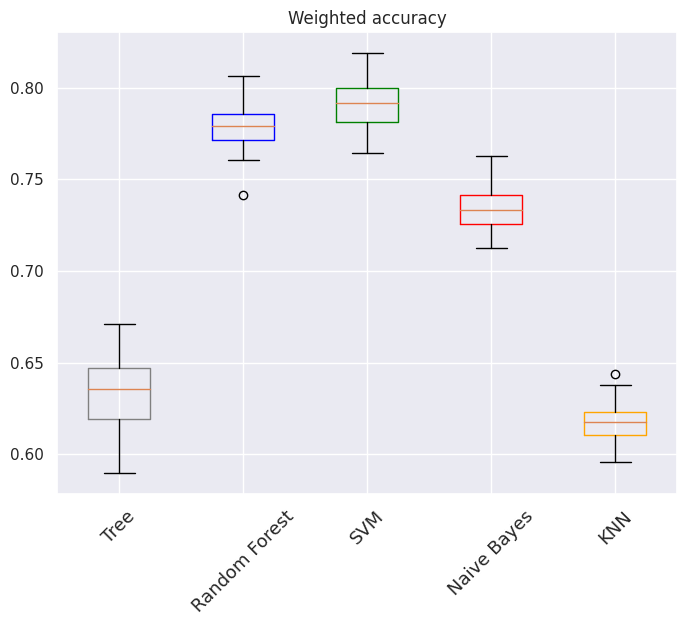

In [48]:
import matplotlib.pyplot as plt

scores_from_loop = [TREE, RAN_FOR, SVM, NB, KNN]
labels = ["Tree", "Random Forest", "SVM", "Naive Bayes", "KNN"]
colors = ['grey', 'blue', 'green', 'red', 'orange']

# Creating plot
fig, (ax) = plt.subplots(figsize=(8, 6), edgecolor= "blue")

bplot = ax.boxplot(scores_from_loop, 
                     vert=True,  # vertical box alignment
                     patch_artist=False,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax.set_title('Weighted accuracy')
ax.set_xticklabels(labels=labels, rotation = 45, fontsize=13)


for patch, color in zip(bplot['boxes'], colors):
    patch.set_color(color)

# show plot
plt.show()


modified version

Text(0.5, 1.0, 'Weighted accuracy')

[Text(1, 0, 'Tree'),
 Text(2, 0, 'Random Forest'),
 Text(3, 0, 'SVM'),
 Text(4, 0, 'Naive Bayes'),
 Text(5, 0, 'KNN')]

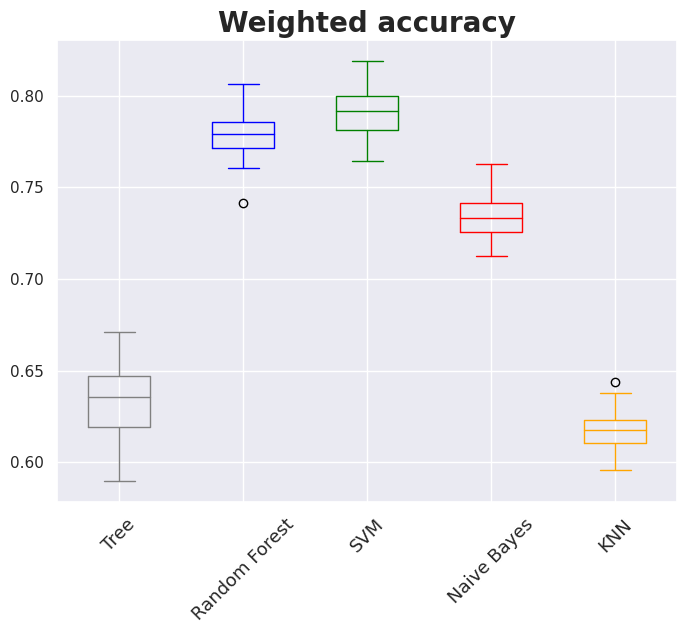

In [66]:
import matplotlib.pyplot as plt

# for fancier plots
import seaborn as sns
sns.set_theme()

scores_from_loop = [TREE, RAN_FOR, SVM, NB, KNN]
labels = ["Tree", "Random Forest", "SVM", "Naive Bayes", "KNN"]
colors = ['grey', 'blue', 'green', 'red', 'orange']
colors2 = ['grey', 'grey', 'blue', 'blue', 'green', 'green', 'red', 'red', 'orange', 'orange']

# Creating plot
fig, (ax) = plt.subplots(figsize=(8, 6), edgecolor= "blue")

bplot = ax.boxplot(scores_from_loop, 
                   vert=True,  # vertical box alignment
                   patch_artist=False,  # fill with color
                   labels=labels)  # will be used to label x-ticks
                   
dict_title = {'fontsize': 20, 'fontweight': 'bold'}
ax.set_title('Weighted accuracy', fontdict=dict_title)
ax.set_xticklabels(labels=labels, rotation = 45, fontsize=13)

for element in ['boxes', 'fliers', 'means', 'medians']:
    for patch, color in zip(bplot[element], colors):
        patch.set_color(color)

for element in ('whiskers', 'caps'):
    for patch, color in zip(bplot[element], colors2):
        patch.set_color(color)

# saving plot
plt.savefig('boxplot.png')

# show plot
plt.show()